In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [86]:
train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [87]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [88]:
train.shape

(1296675, 23)

In [89]:
test.shape

(555719, 23)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Data Cleaning

In [91]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [92]:
train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [93]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Feature Engineering

In [94]:
train.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)

In [95]:
train["transaction_time"] = pd.to_datetime(train["transaction_time"], infer_datetime_format=True)
train["dob"] = pd.to_datetime(train["dob"], infer_datetime_format=True)

In [96]:
from datetime import datetime

# Apply function utcfromtimestamp and drop column unix_time
train['time'] = train['unix_time'].apply(datetime.utcfromtimestamp)
train.drop('unix_time', axis=1)

# Add cloumn hour of day
train['hour_of_day'] = train.time.dt.hour

In [97]:
train[['time','hour_of_day']]

,time,hour_of_day
0,2012-01-01 00:00:18,0
1,2012-01-01 00:00:44,0
2,2012-01-01 00:00:51,0
3,2012-01-01 00:01:16,0
4,2012-01-01 00:03:06,0
...,...,...
1296670,2013-06-21 12:12:08,12
1296671,2013-06-21 12:12:19,12
1296672,2013-06-21 12:12:32,12
1296673,2013-06-21 12:13:36,12


In [98]:
# Change dtypes
train.credit_card_number = train.credit_card_number.astype('category')
train.is_fraud = train.is_fraud.astype('category')
train.hour_of_day = train.hour_of_day.astype('category')

# Check
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   transaction_time    1296675 non-null  datetime64[ns]
 1   credit_card_number  1296675 non-null  category      
 2   merchant            1296675 non-null  object        
 3   category            1296675 non-null  object        
 4   amount(usd)         1296675 non-null  float64       
 5   first               1296675 non-null  object        
 6   last                1296675 non-null  object        
 7   gender              1296675 non-null  object        
 8   street              1296675 non-null  object        
 9   city                1296675 non-null  object        
 10  state               1296675 non-null  object        
 11  zip                 1296675 non-null  int64         
 12  lat                 1296675 non-null  float64       
 13  long        

In [99]:
np.round(train.describe(), 2)

,amount(usd),zip,lat,long,city_pop,unix_time,merch_lat,merch_long
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1.296675e+06,1296675.00,1296675.00
mean,70.35,48800.67,38.54,-90.23,88824.44,1.349244e+09,38.54,-90.23
std,160.32,26893.22,5.08,13.76,301956.36,1.284128e+07,5.11,13.77
min,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67
25%,9.65,26237.00,34.62,-96.80,743.00,1.338751e+09,34.73,-96.90
50%,47.52,48174.00,39.35,-87.48,2456.00,1.349250e+09,39.37,-87.44
75%,83.14,72042.00,41.94,-80.16,20328.00,1.359385e+09,41.96,-80.24
max,28948.90,99783.00,66.69,-67.95,2906700.00,1.371817e+09,67.51,-66.95


# Data Visualization

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

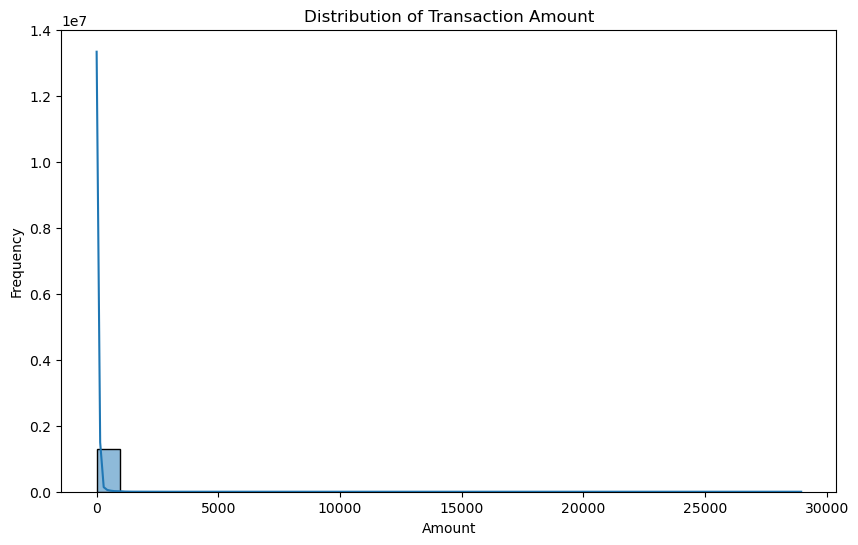

In [101]:
# Histogram of 'amt'
plt.figure(figsize=(10, 6))
sns.histplot(train['amount(usd)'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

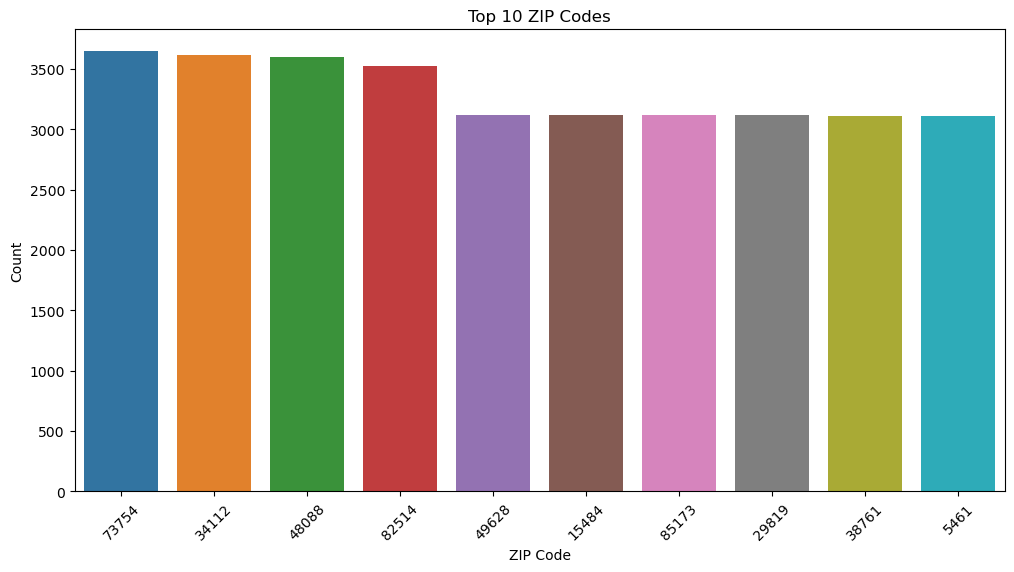

In [102]:
# Count plot of 'zip' with the top 10 ZIP codes
top_zip_codes = train['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train[train['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

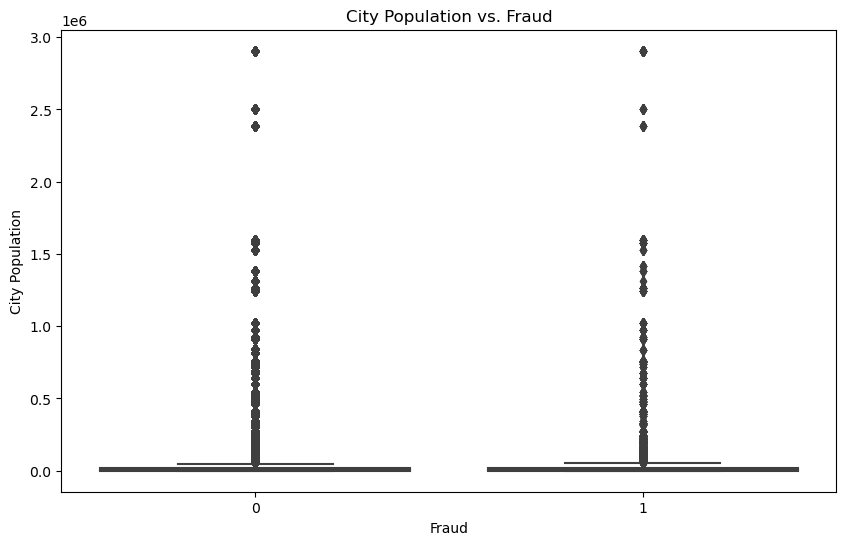

In [103]:
# Box plot of 'city_pop' with 'is_fraud' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=train)
plt.title('City Population vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('City Population')
plt.show()

/tmp/ipykernel_33/2349687465.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


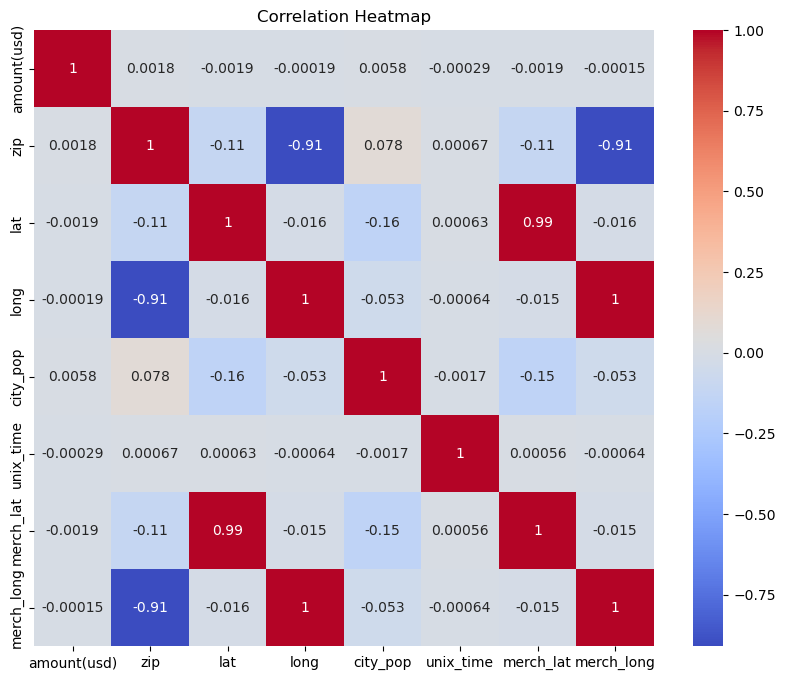

In [104]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Build and train the model

In [105]:
from sklearn.model_selection import train_test_split

features = ['transaction_id', 'hour_of_day', 'category', 'amount(usd)', 'merchant', 'job']


X = train[features].set_index("transaction_id")
y = train['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print('X shape:{}\ny shape:{}'.format(X.shape,y.shape))

X shape:(1296675, 5)
y shape:(1296675,)


In [106]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int64)
categorical_cols = ['category', 'merchant', 'job']

X_train[categorical_cols] = enc.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = enc.transform(X_test[categorical_cols])



In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [108]:
from sklearn.tree import DecisionTreeClassifier

X_train_fs, X_test_fs, _ = select_features(X_train, y_train, X_test)
dcstree = DecisionTreeClassifier(random_state=42)
dcstree.fit(X_train, y_train)

y_pred = dcstree.predict(X_test)

<Axes: >

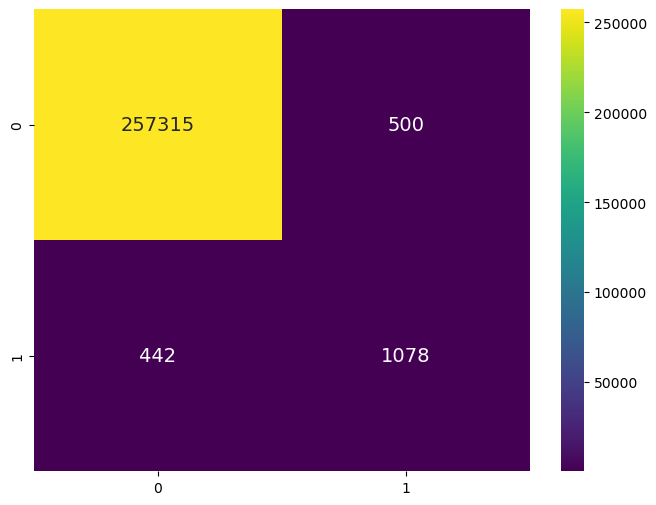

In [109]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(8,6))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.68      0.71      0.70      1520

    accuracy                           1.00    259335
   macro avg       0.84      0.85      0.85    259335
weighted avg       1.00      1.00      1.00    259335



# SMOTE

In [111]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy={1:48050}, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 1031354, 1: 5986})
After SMOTE: Counter({0: 1031354, 1: 48050})


In [112]:
class test_model:
    from sklearn.metrics import classification_report
    def __init__(self):
        self.metrics = ['prfs','auc','acc']

    def fit_predict(model, X_train, X_test, y_train, y_test):
        model = model
        model.fit(X_train, y_train) #Fit data to model
        y_pred = model.predict(X_test)
        return y_pred
    
    def evaluate(y_pred, metrics):
        results = {}
        for metric in metrics:
            if metric == 'prfs':
                prfs = classification_report(y_test, y_pred)
                results['prfs'] = prfs
            elif metric =='auc':
                auc_score = roc_auc_score(y_test, y_pred)
                results['auc'] = auc_score
            elif metric =='acc':
                results['acc'] = accuracy_score(y_test, y_pred)
            else:
                print('Not available metric!')
        return results

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Specify your metric here
metrics = ['prfs']
print("=====================SMOTE=====================")
RDForest_eval = test_model.evaluate(y_pred=test_model.fit_predict(RandomForestClassifier(random_state=42),
                                                                  X_train_smote,
                                                                  X_test,
                                                                  y_train_smote,
                                                                  y_test
                                                                 ),
                                    metrics=metrics
                                    )

print("Random Forest model evaluate:\n", RDForest_eval['prfs'])

=====================SMOTE=====================
Random Forest model evaluate:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.80      0.77      0.78      1520

    accuracy                           1.00    259335
   macro avg       0.90      0.88      0.89    259335
weighted avg       1.00      1.00      1.00    259335



In [114]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [115]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, greater_is_better=True, pos_label=1)

In [116]:
rf_random = RandomForestClassifier(max_features='sqrt',
                                   n_estimators=200,
                                   random_state=41
                                   )

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

# Print reprort
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.89      0.72      0.79      1520

    accuracy                           1.00    259335
   macro avg       0.94      0.86      0.90    259335
weighted avg       1.00      1.00      1.00    259335



In [126]:
# Create a DataFrame with actual values and predictions
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame to see both actual and predicted values
print(output_df)

        Actual  Predicted
1045211      0          0
547406       0          0
110142       0          0
1285953      0          0
271705       0          0
...        ...        ...
402969       0          0
1121903      0          0
55293        0          0
1150396      0          0
658150       0          0

[259335 rows x 2 columns]
